In [2]:
import numpy as np
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [35]:
data=pd.read_csv('train.csv')
data=data[:1000]

In [36]:
print(xt.shape)

(100, 784)


In [45]:
xd=data.values[:,1:]
yd=data.values[:,0]
xtrain=xd[:900,:]
ytrain=yd[:900]
xtest=xd[900:,:]
ytest=xd[900:]

In [5]:
A=np.cov(xd.T)

In [6]:
eig_vals, eig_vecs = np.linalg.eig(A)
print (eig_vals.shape[0],eig_vecs.shape)

784 (784, 784)


In [7]:
inf=[]
for i in range(eig_vals.shape[0]):
    dx=[eig_vals[i],eig_vecs[:,i]]
    inf.append(dx)
print(len(inf))

784


In [8]:
sinf=sorted(inf,key=lambda x:x[0],reverse=True)

/home/aayush/.local/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


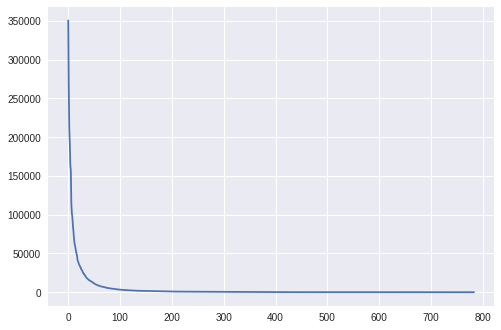

In [9]:
s_eigval=[]
s_eigvec=[]
for i in range(len(sinf)):
    s_eigval.append(sinf[i][0])
    s_eigvec.append(sinf[i][1])
s_eigval=np.asarray(s_eigval)
s_eigvec=np.asarray(s_eigvec)
plt.figure(0)
plt.plot(s_eigval)
plt.show()

[ 0.09984479 +8.97231543e-38j  0.17537606 +1.57597541e-37j
  0.23560051 +2.11716819e-37j  0.29044176 +2.60998609e-37j
  0.33736323 +3.03163476e-37j  0.38206562 +3.43334216e-37j
  0.41459895 +3.72569519e-37j  0.44355950 +3.98594238e-37j
  0.47115508 +4.23392352e-37j  0.49553409 +4.45299967e-37j]


/home/aayush/.local/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


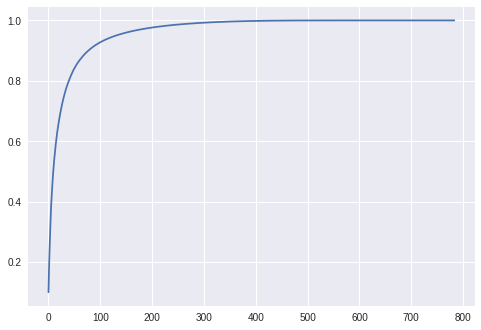

In [10]:
cumsum=np.cumsum((s_eigval/s_eigval.sum()))
print(cumsum[:10])
plt.figure(0)
plt.plot(cumsum)
plt.show()

In [11]:
for i in range(cumsum.shape[0]):
    if cumsum[i]>=0.99:
        print(i)
        break

277


In [43]:
k=i
eig_vecs=s_eigvec[:,:k]
datab=xd.dot(eig_vecs)
xte=datab[900:,:]
xtr=datab[:900,:]

ytr=yd[:900]
yte=yd[900:]
databack=datab.dot(eig_vecs.T)
print(datab.shape)

(1000, 277)


In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
neigh = KNeighborsClassifier(n_neighbors=3)
nei= KNeighborsClassifier(n_neighbors=3)

In [47]:
neigh.fit(xtrain, ytrain)
nei.fit(xtr,ytr)

/home/aayush/.local/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [52]:
ori=neigh.predict(xtest)
red=nei.predict(xte)
print(100*float((ori== red).sum())/100)

91.0


/home/aayush/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:382: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


# reconstruction of data

/home/aayush/.local/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


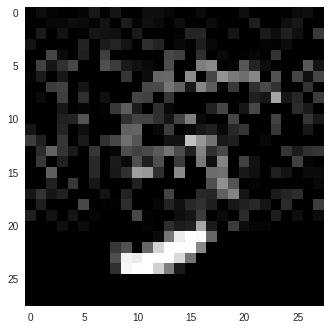

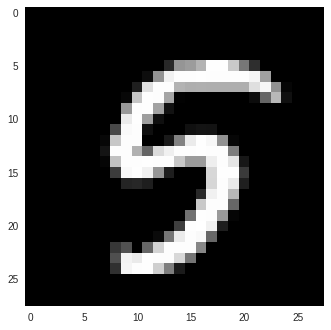

In [13]:
n=8

plt.figure(0)
plt.grid("off")
im = (databack[n]>0) * databack[n]
plt.imshow(np.asarray(im.reshape((28, 28)), dtype='uint8'), cmap='gray')
plt.show()

plt.figure(1)
plt.grid("off")
#im = (databack[n]>0) * databack[n]
plt.imshow(xd[n].reshape((28,28)), cmap='gray')
plt.show()


# pca from sklearn

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA()

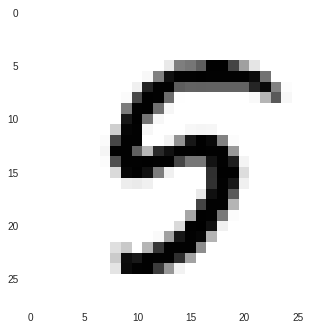

(1000, 784)


In [22]:
plt.figure(0)
plt.grid("off")
#im = (databack[n]>0) * databack[n]
plt.imshow(xd[n].reshape((28,28)))
plt.show()
print(xd.shape)

In [23]:
pca.fit_transform(xd)

array([[ -6.29409404e+02,   7.30392466e+02,  -1.99311780e+02, ...,
         -0.00000000e+00,   0.00000000e+00,  -0.00000000e+00],
       [  1.73573028e+03,   3.22274277e+02,   7.68686450e+02, ...,
         -9.68484347e-16,   5.50566816e-15,   6.16422121e-15],
       [ -8.41009353e+02,   3.02774107e+02,  -6.66948384e+01, ...,
          1.82822223e-15,   1.58656293e-14,   1.50385536e-15],
       ..., 
       [ -5.40155483e+02,  -8.02483746e+02,   3.01007574e+02, ...,
         -4.94873443e-15,   2.17216723e-15,   1.32481068e-14],
       [  2.90927380e+02,   2.53810666e+02,  -6.94905077e+02, ...,
          9.83654572e-15,   3.48806953e-16,   4.34286184e-15],
       [ -4.37235399e+02,  -2.44066918e+02,   5.33842043e+02, ...,
          1.93203894e-14,  -5.99761441e-15,   6.00887334e-16]])

In [21]:
#print(pca.explained_variance_ratio_[:10])
#print(pca.score)
#pca.get_precision()

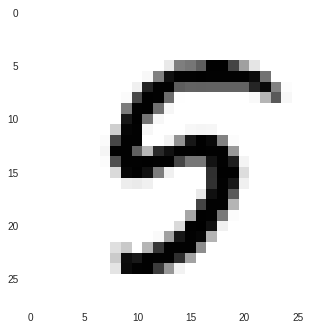

(1000, 784)


In [24]:
plt.figure(0)
plt.grid("off")
#im = (databack[n]>0) * databack[n]
plt.imshow(xd[n].reshape((28,28)))
plt.show()
print(xd.shape)